## Workshop 1a: Introduction to Optimisation with Pyomo

### 1. Installing and Importing Packages 

We first need to pull in all the packages we will be using. Pyomo is a Python-based, open-source optimization modelling language with a diverse set of optimization capabilities. For more information, see the Pyomo [documentation](https://pyomo.readthedocs.io/en/stable/).

In [1]:
import matplotlib.pyplot as plt
from pyomo.environ import *
import numpy as np
from ipywidgets import FloatSlider, interact, widgets
import platform
from IPython.display import display

# Ipopt solver setup for Windows or Linux
def setup_solver():
    os_name = platform.system()
    if os_name == "Windows":
        return "solver/ipopt.exe"
    elif os_name == "Linux":
        !chmod +x "solver/ipopt"
        return "solver/ipopt"


solver_executable = setup_solver()

### 2. Continuous Optimisation Problem Example

#### a. Non-Constrained Problem

$$ 
\text{minimize} \quad f(x_1, x_2) = x_1^2 + x_2^2 
$$

$$ 
x_1, x_2 \in \mathbb{R} 
$$



In [2]:
# Create a model
model = ConcreteModel()

# Define decision variables
model.x1 = Var(domain=Reals)
model.x2 = Var(domain=Reals)

# Objective function
model.obj = Objective(expr=model.x1**2 + model.x2**2, sense=minimize)

# Create a solver
solver = SolverFactory("ipopt", executable=solver_executable)

# Solve the model
solver.solve(model)

# Display the results
print(f"x1: {model.x1()}")
print(f"x2: {model.x2()}")
print(f"Objective Value: {model.obj()}")

x1: 0.0
x2: 0.0
Objective Value: 0.0


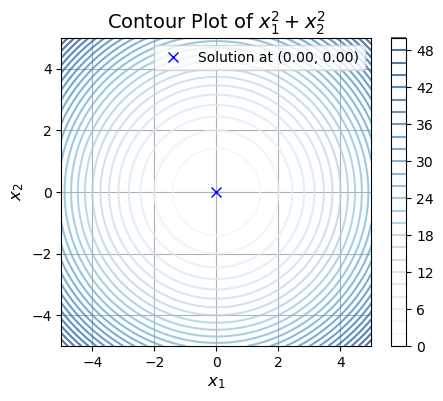

In [3]:
### RUN ME!
# Create a grid of x1 and x2 values
x1_vals = np.linspace(-5, 5, 400)
x2_vals = np.linspace(-5, 5, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Define the objective function x1^2 + x2^2
Z = X1**2 + X2**2

# Create a contour plot
plt.figure(figsize=(5, 4))
contour = plt.contour(X1, X2, Z, levels=30, cmap="Blues", alpha=0.7)
plt.colorbar(contour)

# Highlight the minimum point
plt.plot(
    model.x1(),
    model.x2(),
    "bx",
    markersize=7,
    label=f"Solution at ({model.x1():.2f}, {model.x2():.2f})",
)

# Set plot labels and title
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$x_2$", fontsize=12)
plt.title("Contour Plot of $x_1^2 + x_2^2$", fontsize=14)

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)

#### b. Optimisation Problem with Inequality Constraint

$$
\text{minimize} \quad f(x_1, x_2) = x_1^2 + x_2^2
$$

$$
\text{s.t.} \quad x_1 + x_2 \geq 1
$$

$$
x_1, x_2 \in \mathbb{R}
$$

In [4]:
# Create a model
model = ConcreteModel()

# Define decision variables
model.x1 = Var(domain=Reals)
model.x2 = Var(domain=Reals)

# Objective function
model.obj = Objective(expr = model.x1**2 + model.x2**2, sense=minimize)

# Add an Equality constraint
model.constr = Constraint(expr=model.x1 + model.x2 >=1)

# Create a solver
solver = SolverFactory('ipopt', executable=solver_executable)

# Solve the model
solver.solve(model)

# Display the results
print(f"x1: {model.x1():.2f}")
print(f"x2: {model.x2():.2f}")
print(f"Obj: {model.obj():.2f}")

x1: 0.50
x2: 0.50
Obj: 0.50


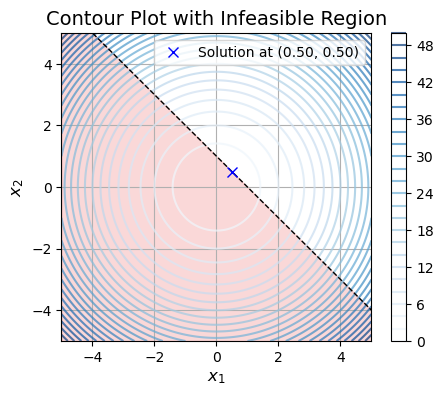

In [5]:
x1_vals = np.linspace(-5, 5, 400)
x2_vals = np.linspace(-5, 5, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Define the objective function x1^2 + x2^2
Z = X1**2 + X2**2

# Create a contour plot
plt.figure(figsize=(5, 4))
contour = plt.contour(X1, X2, Z, levels=30, cmap="Blues", alpha=0.7)
plt.colorbar(contour)

# Plot Infeasible Region
plt.fill_betweenx(
    x1_vals,
    (1 - x1_vals),
    -5,
    where=((1 - x1_vals) >= -5),
    color="lightcoral",
    alpha=0.3,
    #label="$x_1 + x_2 < 1$",
)
plt.plot(
    x1_vals,
    (1 - x1_vals),
    color="black",
    linestyle="--",
    linewidth=1,
)

# Highlight Solution
plt.plot(
    model.x1(),
    model.x2(),
    "bx",
    markersize=7,
    label=f"Solution at ({model.x1():.2f}, {model.x2():.2f})",
)

# Labels & Titles
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$x_2$", fontsize=12)
plt.title(f"Contour Plot with Infeasible Region", fontsize=14)

# Set plot limits
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.legend()
plt.grid(True)
plt.show()


### c. Optimization Problem with Inequality and Equality Constraints

$$
\text{minimize} \quad f(x_1, x_2) = x_1^2 + x_2^2
$$

$$
\text{s.t.} \quad x_1 + x_2 \geq 1
$$

$$
\text{s.t.} \quad x_2 = 1
$$

$$
x_1, x_2 \in \mathbb{R}
$$


In [6]:
# Create a model
model = ConcreteModel()

# Define decision variables
model.x1 = Var(domain=Reals)
model.x2 = Var(domain=Reals)

# Objective function
model.obj = Objective(expr=model.x1**2 + model.x2**2, sense=minimize)

# Add an inequality constraint
model.constr2 = Constraint(expr=model.x2 + model.x1 >= 1)

# Add an equality constraint
model.constr1 = Constraint(expr=model.x2 == 1)

# Create a solver
solver = SolverFactory('ipopt', executable=solver_executable)

# Solve the model
solver.solve(model)

# Display the results
print(f"x1: {model.x1():.2f}")
print(f"x2: {model.x2():.2f}")
print(f"Obj: {model.obj():.2f}")

x1: 0.00
x2: 1.00
Obj: 1.00


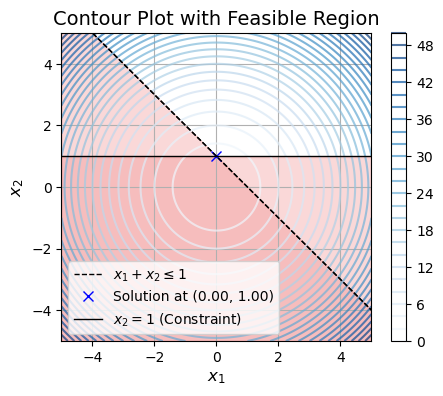

In [7]:
x1_vals = np.linspace(-5, 5, 400)
x2_vals = np.linspace(-5, 5, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Define the objective function x1^2 + x2^2
Z = X1**2 + X2**2

# Create a contour plot
plt.figure(figsize=(5, 4))
contour = plt.contour(X1, X2, Z, levels=30, cmap="Blues", alpha=0.7)
plt.colorbar(contour)

# Plot Infeasible Region
plt.fill_betweenx(
    x1_vals,
    (1 - x1_vals),
    -5,
    where=((1 - x1_vals) >= -5),
    color="lightcoral",
    alpha=0.3,
    #label="$x_1 + x_2 < 1$",
)

# Fill the area where x2 = 1
plt.fill_betweenx(
    x2_vals,
    -5,  # Start at -5 on the x-axis
    5,    # End at 5 on the x-axis
    where=(x2_vals <= 1),
    color="lightcoral",
    alpha=0.3,
)

plt.plot(
    x1_vals,
    (1 - x1_vals),
    color="black",
    linestyle="--",
    linewidth=1,
    label="$x_1 + x_2 \\leq 1$",
)

# Highlight Solution
plt.plot(
    model.x1(),
    model.x2(),
    "bx",
    markersize=7,
    label=f"Solution at ({model.x1():.2f}, {model.x2():.2f})",
)

# Add a vertical line at the constraint x1 = -2
plt.axhline(1, color="black", linewidth=1, label="$x_2 = 1$ (Constraint)")
plt.plot(
    x1_vals,
    (1 - x1_vals),
    color="black",
    linestyle="--",
    linewidth=1,
)

# Labels & Titles
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$x_2$", fontsize=12)
plt.title(f"Contour Plot with Feasible Region", fontsize=14)

# Set plot limits
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.legend()
plt.grid(True)
plt.show()

### d. Interactive Feasibility Region Visualisation

$$
\text{minimize} \quad f(x_1, x_2) = x_1^2 + x_2^2
$$

$$
\text{s.t.} \quad x_1 + x_2 \geq c_1
$$

$$
\quad x_2 = c_2
$$

$$
x_1, x_2 \in \mathbb{R}
$$

In [8]:
### RUN ME! 
def plot_filled_region(c1=1.0, c2=2.0):
    # Create a grid of x1 values
    x1_vals = np.linspace(-5, 5, 400)

    # Define the boundaries based on the slider values
    x2_boundary1 = c1 - x1_vals                 # x1 + x2 >= C1 -> x2 >= C1 - x1
    x2_boundary2 = c2 * np.ones_like(x1_vals)   # x2 = C2

    # Create a new figure
    plt.figure(figsize=(8, 6))

    # Fill the area that satisfies both constraints
    plt.fill_between(
        x1_vals,
        np.maximum(x2_boundary1, c2),  # Fill from the maximum of both boundaries
        5,  # Upper limit (arbitrary large value)
        where=(np.maximum(x2_boundary1, c2) <= 5),  # Ensure we fill within the limits
        color="orange",
        alpha=0.5,
        label=f"Feasible Region: $x_1 + x_2 \\geq {c1}$ and $x_2 = {c2}$",
    )

    # Plot the lines for visualization
    plt.plot(
        x1_vals,
        x2_boundary1,
        color="blue",
        linestyle="-",
        linewidth=2,
        label=f"$x_1 + x_2 \\geq {c1}$",
    )
    plt.plot(
        x1_vals,
        x2_boundary2,
        color="red",
        linestyle="--",
        linewidth=2,
        label=f"$x_2 = {c2}$",
    )

    # Set plot limits
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)

    # Set plot labels and title
    plt.xlabel("$x_1$", fontsize=12)
    plt.ylabel("$x_2$", fontsize=12)
    plt.title("Interactive Feasible Region Visualization", fontsize=14)

    # Add a legend
    plt.legend()

    # Display the plot
    plt.grid(True)
    plt.axhline(0, color="black", linewidth=0.5, ls="--")  # X-axis
    plt.axvline(0, color="black", linewidth=0.5, ls="--")  # Y-axis
    plt.show()

# Create interactive sliders for the constraints
c1_slider = FloatSlider(
    value=1.0, min=0, max=5, step=0.1, description="c1"
)
c2_slider = FloatSlider(
    value=2.0, min=0, max=5, step=0.1, description="c2"
)

# Use interact to link the sliders to the plotting function
interact(plot_filled_region, c1=c1_slider, c2=c2_slider)

interactive(children=(FloatSlider(value=1.0, description='c1', max=5.0), FloatSlider(value=2.0, description='c…

<function __main__.plot_filled_region(c1=1.0, c2=2.0)>

### 3. Simple LP Exploring Lagrange Multipliers

$$
\text{minimize} \quad -x_1 - x_2
$$

$$
\text{s.t.} -x_1 + x_2 \geq 0 
$$

$$

$$

$$
x_1 \leq 2 
$$

$$
x_2 \leq 3 
$$

$$
x_1, x_2 \in \mathbb{R}
$$


#### a. Formulating and Solving Optimisation Problem

In [9]:
# Create a model
model = ConcreteModel()

# Define decision variables as integers
model.x1 = Var(domain=NonNegativeReals)
model.x2 = Var(domain=NonNegativeReals)

# Objective function
model.obj = Objective(expr=-model.x1 - model.x2, sense=minimize)

# Constraints
model.constraint1 = Constraint(expr=model.x1 <= 2)
model.constraint2 = Constraint(expr=model.x2 <= 3)
model.constraint3 = Constraint(expr=-model.x1 + model.x2 >= 0)

# Extract dual values (shadow prices)
model.dual = Suffix(direction=Suffix.IMPORT)

# Create a solver
solver = SolverFactory("ipopt", executable=solver_executable)

# Solve the model
solver.solve(model)

# Display the results
print(f"x1: {model.x1():.2f}")
print(f"x2: {model.x2():.2f}")
print(f"Obj: {model.obj():.2f}")

x1: 2.00
x2: 3.00
Obj: -5.00


#### b. Interactive Feasibility Region

In [10]:
# Function to update the plot
def plot_feasible_region(x2_limit, x1_limit):
    # Define the limits for the plot
    x1 = np.linspace(0, 4, 400)
    x2_1 = x1  # Line for x2 = x1
    x2_2 = np.full_like(x1, x2_limit)  # Upper limit for x2

    # Set up the plot
    plt.figure(figsize=(8, 4))

    # Plot the constraints
    plt.plot(x1, x2_1, label=r'$x_2 = x_1$', color='green')
    plt.plot(x1, x2_2, label=f'$x_2 = {x2_limit}$', color='blue')
    plt.axvline(x=x1_limit, color='orange', label=f'$x_1 = {x1_limit}$')

    # Fill the feasible region based on updated constraints
    plt.fill_between(x1, np.maximum(x2_1, 0), x2_2,
                     where=(x1 <= x1_limit) & (x2_2 >= np.maximum(x2_1, 0)), 
                     color='yellow', alpha=0.5, label='Feasible Region')

    # Set labels and title
    plt.xlabel(r'$x_1$', fontsize=14)
    plt.ylabel(r'$x_2$', fontsize=14)
    plt.title('Feasible Region and Continuous Points', fontsize=16)
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.xticks(np.arange(0, 5, 1))
    plt.yticks(np.arange(0, 5, 1))
    plt.grid(True)
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.legend()
    plt.show()

# Create sliders for x2_limit and x1_limit with continuous values
x2_limit_slider = widgets.FloatSlider(value=3.0, min=0.0, max=5.0, step=0.1, description='x2 limit:')
x1_limit_slider = widgets.FloatSlider(value=2.0, min=0.0, max=5.0, step=0.1, description='x1 limit:')

# Use interactive output to update the plot based on slider values
interactive_plot = widgets.interactive(plot_feasible_region, x2_limit=x2_limit_slider, x1_limit=x1_limit_slider)
display(interactive_plot)


interactive(children=(FloatSlider(value=3.0, description='x2 limit:', max=5.0), FloatSlider(value=2.0, descrip…

#### c. Marginal Price Exploration

Using the interactive plot below, determine the range of validity for constraint 1 and 2.

In [11]:
# Define the marginal prices for each constraint
dual_1 = model.dual[model.constraint1]  
dual_2 = model.dual[model.constraint2]
#dual_3 = model.dual[model.constraint3] 

print("================ Dual Values ================")
print("Constraint x1 <= 2 (dual_1):", f"{-1*dual_1:.2f}")
print("Constraint x2 <= 3 (dual_2):", f"{-1*dual_2:.2f}")
#print("Constraint x2 >= x1 (dual_3):", f"{-1*dual_3:.2f}")

================ Dual Values ================
Constraint x1 <= 2 (dual_1): -1.00
Constraint x2 <= 3 (dual_2): -1.00


#### d. Using Marginal Price to Calculate Recalculate Objective

In [12]:
# Calculate the change in the objective function for a given change in constraint 2

# Current obj value
print(f"\nCurrent Objective Value: {model.obj():.2f}")

# For example, let's assume we relax constraint 1 by 10 units
change_in_constraint_2 = 10
change_in_objective = -dual_2 * change_in_constraint_2
print(f"\nChange in objective function with +{change_in_constraint_2} on constraint 2: {change_in_objective:.2f}")

new_obj_value = model.obj() + change_in_objective
print(f"\nNew Objective Value: {new_obj_value:.2f}")


Current Objective Value: -5.00

Change in objective function with +10 on constraint 2: -10.00

New Objective Value: -15.00


#### e. Verify Marginal Price Exploration with Re-Solving Problem

In [13]:
# Create a model
model = ConcreteModel()

# Define decision variables as integers
model.x1 = Var(domain=NonNegativeReals)
model.x2 = Var(domain=NonNegativeReals)

# Objective function
model.obj = Objective(expr=-model.x1 - model.x2, sense=minimize)

# Constraints
model.constraint1 = Constraint(expr=-model.x1 + model.x2 >= 0)
model.constraint2 = Constraint(expr=model.x1 <= 2)
model.constraint3 = Constraint(expr=model.x2 <= 13)

# Extract dual values (shadow prices)
model.dual = Suffix(direction=Suffix.IMPORT)

# Create a solver
solver = SolverFactory("ipopt", executable=solver_executable)

# Solve the model
solver.solve(model)

# Display the results
print(f"x1: {model.x1():.2f}")
print(f"x2: {model.x2():.2f}")

print(f"New Obj: {model.obj():.2f}")

x1: 2.00
x2: 13.00
New Obj: -15.00
